In [1]:
# Import Libraries
import os

import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import PIL
import cv2
import string
import pickle
import random

In [2]:
# Listing out our categories and the directory to these files
extra_categories = ['del', 'space', 'nothing']
CATEGORIES = list(string.ascii_uppercase) + extra_categories

DATADIR = './data/'
training_path = DATADIR + 'asl_alphabet_train/'

(200, 200, 3)


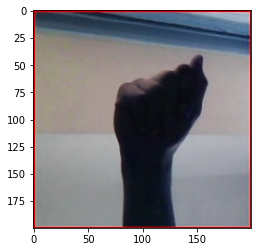

In [3]:
# Shows one image and its dimensions
for sign in CATEGORIES:
    path = training_path + sign + '/'
    for file in os.listdir(path):
        full_path = os.path.join(path, file) # Joins folder path with file name
        img_arr = cv2.imread(full_path, cv2.IMREAD_COLOR)
        plt.imshow(img_arr, cmap='gray')
        print(img_arr.shape)
        break
    break

In [4]:
print(type(img_arr), img_arr.shape)

<class 'numpy.ndarray'> (200, 200, 3)


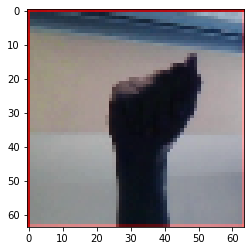

In [5]:
# Shows image after downsizing it from 200x200x3 to 64x64x3
IMG_SIZE = 64
resize_img = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
plt.imshow(resize_img)

In [6]:
resize_img.shape

(64, 64, 3)

In [ ]:
# training_data = []

# def create_training_data():
#     for sign in CATEGORIES:
#         path = training_path + sign + '/'
#         for file in os.listdir(path)[:200]:
#             try:
#                 full_path = os.path.join(path, file)                  # Joins folder path with file name
#                 img_arr = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE) # Read in img from file and convert to grayscale
#                 img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))   # Resize img
#                 training_data.append([img_arr, sign])       # Add into our training set with its classification
#             except Exception as e:          # Incase there was an error in the image file
#                 print('Error in file:')
#                 print(full_path)

# create_training_data()

In [7]:
# Def: create_data is a function that helps parse the dataset
# @params: path        - path is the parent folder that contains all the images
# @params: categories  - classifications
# @params: resize      - the wanted image size
# @params: color       - cv2's cv2.IMREAD color
# @returns: list       - returns a list len 2 where index 0 is the 2d array, and index 1 is the label
def create_data(folder_path, categories, resize=64, color=cv2.IMREAD_GRAYSCALE):
    data = []
    
    for sign in categories:
        path = folder_path + sign + '/'
        
        if not os.path.exists(path):
            continue
        
        classification = CATEGORIES.index(sign)
        for file in os.listdir(path):
            try:
                full_path = os.path.join(path, file)                  # Joins folder path with file name
                img_arr = cv2.imread(full_path, color) # Read in img from file and convert to grayscale
                img_arr = cv2.resize(img_arr, (resize, resize))   # Resize img
                data.append([img_arr, classification])       # Add into our training set with its classification
            except Exception as e:          # Incase there was an error in the image file
                print('Error in file:')
                print(full_path)
                
    if not len(data):
        print('Error no data was found')
    
    return data

# training_data = create_data(training_path, CATEGORIES, color=cv2.IMREAD_COLOR)



In [ ]:
print('training_data size:', len(training_data))

In [ ]:
type(training_data)

In [ ]:
training_data = np.asarray(training_data)
training_data.shape

In [ ]:
# print(training_data[0][0])
training_data[0][0].shape

In [ ]:
training_data[0][1]

In [ ]:
training_data = list(training_data)

In [ ]:
# Shuffle Data
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

In [ ]:
# creating SVM dataset in grayscale
X = []
y = []

for features, label in training_data:
    X.append(features.flatten())
    y.append(label)

X = np.asarray(X)
y = np.asarray(y)

In [ ]:
print(len(X[0]), X.shape)
print(X)

In [ ]:
print(y)

In [ ]:
# Saving SVM dataset in grayscale
pickle_out = open("svm_X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("svm_y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("svm_X.pickle", "rb")
X = pickle.load(pickle_in)

In [ ]:
X[1]

In [8]:
# Creating dataset for cnn using rgb 
data = create_data(training_path, CATEGORIES, color=cv2.IMREAD_COLOR)

In [9]:
random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append([label])

X = np.asarray(X)
y = np.asarray(y)

In [10]:
X.shape

(87000, 64, 64, 3)

In [11]:
y.shape

(87000, 1)

In [12]:
# to normalize the data but it is huge
# X = X / 255


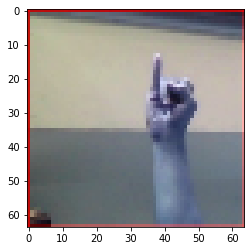

In [14]:
plt.imshow(X[0])

In [15]:
cate = {}
for label in y:
    label = label[0]
    if not label in cate:
        cate[label] = 1
    else:
        cate[label] += 1

In [16]:
len(cate)

29

In [17]:
label_df = pd.DataFrame(cate.items(), columns=['label', 'count'])

In [18]:
label_df.head()

,label,count
0,8,3000
1,28,3000
2,17,3000
3,4,3000
4,9,3000


In [19]:
label_df['count'].describe()

count      29.0
mean     3000.0
std         0.0
min      3000.0
25%      3000.0
50%      3000.0
75%      3000.0
max      3000.0
Name: count, dtype: float64

In [ ]:
y[:5]

In [20]:
pickle_out = open("./pickle_files/cnn_X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("./pickle_files/cnn_y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("./pickle_files/CATEGORIES.pickle","wb")
pickle.dump(CATEGORIES, pickle_out)
pickle_out.close()

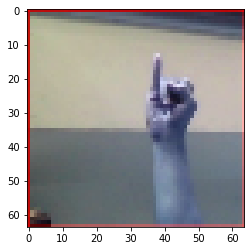

In [21]:
# plt.figure(figsize=(8,8))

plt.imshow(X[0])

In [25]:
y[0]

array([8])